In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np


In [ ]:
# creat file path to csv
data_df= pd.read_csv("../data/Provisional_COVID-19_Deaths_by_Sex_and_Age.csv")
data_df.head()

#delete unecessary columns
covid_deaths_df= data_df[['Data As Of','State','Start Date','End Date','Sex',
                                     'Age Group','COVID-19 Deaths','Total Deaths','Pneumonia and COVID-19 Deaths',
                                     ]]
covid_deaths_df.head(52)        


In [ ]:
covid_deaths_df.dtypes

In [ ]:
#removing male/female
all_sexes_covid_deaths_df= covid_deaths_df.loc[(covid_deaths_df['Sex']=='All Sexes')&(covid_deaths_df['Age Group']=='All Ages')]
all_sexes_covid_deaths_df.head(52)

In [ ]:
#confirming which states are under column state in order to filter out any unwanted "states"
unique_values = all_sexes_covid_deaths_df['State'].unique()
unique_values

In [ ]:
#filter out unwanted data in the States column that we are not using for analysis
filtered_by_state= all_sexes_covid_deaths_df.loc[(all_sexes_covid_deaths_df ['State']!='Puerto Rico') & (all_sexes_covid_deaths_df['State']!='United States')
                                      & (all_sexes_covid_deaths_df['State']!= 'District of Columbia')] 

filling_null_df= filtered_by_state.fillna(0) 
filling_null_df.head(52)

In [ ]:
drop_dupe= filling_null_df.drop_duplicates(subset=['State'])
drop_dupe.head(53)


In [ ]:
drop_dupe.to_csv("CLEAN_FINAL2_Provisional_COVID-19_Deaths_by_Sex_and_Age.csv", index = False)
drop_dupe.head(53)

In [ ]:
unique_values = drop_dupe['State'].unique()
unique_values

In [ ]:
clean_df=pd.read_csv("../data/CLEAN_FINAL2_Provisional_COVID-19_Deaths_by_Sex_and_Age.csv")
clean_df.head(53)

In [ ]:
#making bar graph using groupby function to display COVID-19 deaths per state 
grouped_by_df = clean_df.groupby(['State'])['COVID-19 Deaths'].sum().reset_index()

#plot bar graph
grouped_by_df.plot(kind='bar', x='State', y='COVID-19 Deaths', legend=False)

# Add labels and title
plt.xlabel('State')
plt.ylabel('COVID-19 Deaths')
plt.title('COVID-19 Deaths per State')


In [ ]:
#making bar graph using groupby function to display Pneumonia and COVID-19 Deaths 
grouped_by_df = clean_df.groupby(['State'])['Pneumonia and COVID-19 Deaths'].sum().reset_index()

#plot bar graph
grouped_by_df.plot(kind='bar', x='State', y='Pneumonia and COVID-19 Deaths', legend=False)

# Add labels and title
plt.xlabel('State')
plt.ylabel('Pneumonia and COVID-19 Deaths')
plt.title('Pneumonia and COVID-19 Deaths per State')


In [ ]:
#make dataframe to group states by regions
def assign_region(state):
    # Replace these conditions with your criteria
    if state in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'New Jersey', 'Pennsylvania']:
        return 'Northeast'
    elif state in ['Ohio', 'Michigan', 'Indiana', 'Illinois', 'Wisconsin', 'Minnesota', 'Iowa', 'Missouri', 'Kansas','North Dakota', 'South Dakota','Nebraska']:
        return 'Midwest'
    elif state in ['Delaware', 'Maryland', 'Virginia', 'West Virginia', 'Kentucky', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Alabama', 'Tennessee', 'Mississippi', 'Louisiana', 'Arkansas', 'Texas', 'Oklahoma']:
        return 'South'
    elif state in ['Montana', 'Idaho', 'Wyoming', 'Colorado', 'New Mexico', 'Arizona', 'Utah', 'Nevada', 'California', 'Oregon', 'Washington', 'Alaska', 'Hawaii']:
        return 'West'
    else:
        return 'Unknown'
clean_df['Region'] = clean_df['State'].apply(assign_region)



In [ ]:
region_population = clean_df.groupby('Region')['COVID-19 Deaths'].sum()
# Create a pie chart
plt.pie(region_population, labels=region_population.index, autopct='%1.1f%%', startangle=140)
plt.title('COVID-19 Deaths Per Region')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.show()

In [ ]:
region_population = clean_df.groupby('Region')['Pneumonia and COVID-19 Deaths'].sum()

# Create a pie chart
plt.pie(region_population, labels=region_population.index, autopct='%1.1f%%', startangle=140)
plt.title('Pnuemonia and COVID-19 Deaths Per Region')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.show()

In [ ]:
region_sum =clean_df.groupby('Region')['COVID-19 Deaths'].sum()
region_sum_df= pd.DataFrame(region_sum)
region_sum_df.reset_index(inplace=True)
region_sum_df

In [ ]:
#make histogram per region of covid-19 deaths

# Plotting a histogram
region_sum_df.plot(kind='hist', alpha=0.5, legend=True,)
plt.title('COVID-19 Deaths Per Region')
plt.xlabel('Region')
plt.ylabel('COVID-19 Deaths')
plt.show()

In [ ]:
#make histogram per region of covid-19 & pnuemonia deaths
clean_df.groupby('Region')['Pneumonia and COVID-19 Deaths'].plot(kind='hist', alpha=0.5, legend=True)
plt.title('Pneumonia and COVID-19 Deaths Per Region')
plt.xlabel('Region')
plt.ylabel('Pneumonia and COVID-19 Deaths')
plt.show()

In [ ]:
# Create a box-and-whisker plot for covid-19 deaths by regions
clean_df.boxplot(column='COVID-19 Deaths', by='Region', notch=True, vert=False)
plt.title('Box-and-Whisker Plot of COVID-19 Deaths by Region')
plt.xlabel('COVID-19 Deaths')
plt.ylabel('Region')
plt.show()

In [ ]:
# Create a box-and-whisker plot of covid-19 and pneumonia deaths by regions
clean_df.boxplot(column='Pneumonia and COVID-19 Deaths', by='Region', notch=True, vert=False)
plt.title('Box-and-Whisker Plot of Pneumonia and COVID-19 Deaths by Region')
plt.xlabel('Pneumonia and COVID-19 Deaths')
plt.ylabel('Region')
plt.show()

In [ ]:
#read in clean and merged data
merged_df= pd.read_csv("../data/CLEAN_merged_all.csv")
merged_df.head(50)

In [ ]:
#pie chart for 18+ with a completed series by region
#groupby_18 = merged_df.groupby('Region')['Residents 18+ with a completed primary series'].mean()
merged_df.groupby(['Region']).sum().plot(kind='pie', y='Residents 18+ with a completed primary series', autopct='%1.1f%%')
# Create a pie chart
# plt.pie(groupby_18, labels=groupby_18.index, autopct='%1.1f%%', startangle=140)
# plt.title('18+ With A Completed Vaccination Series Per Region')
# plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
# plt.show()


In [ ]:
set_index = merged_df.set_index('State')
set_index.head()

In [ ]:
#pie chart for 65+ with a completed series by region
groupby_5 = merged_df.groupby('Region')['Residents 5+ with a completed primary series'].mean()

# Create a pie chart
plt.pie(groupby_5, labels=groupby_18.index, autopct='%1.1f%%', startangle=140)
plt.title('5+ With A Completed Vaccination Series Per Region')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.show()

In [ ]:
merged_df.head(50)

In [ ]:
# #large state populations 
# large_states= merged_df.loc[merged_df['2022 Population Estimate']>=22244823]
# large_states.head()

In [ ]:
#medium state populations
# medium_states_rows= merged_df.loc[(merged_df['2022 Population Estimate'] < 22244823)&(merged_df['2022 Population Estimate'] > 4129968)]
# medium_states_rows.head(23)

In [ ]:
# small_states_rows= merged_df.loc[merged_df['2022 Population Estimate']< 4129968]
# small_states_rows.head(23)

In [ ]:
large_states['COVID-19 Deaths'].plot(kind='hist', alpha=0.5, legend=True,)
plt.title('COVID-19 Deaths Per Region')
plt.xlabel('Region')
plt.ylabel('COVID-19 Deaths')
plt.show()

In [ ]:
# small_states_rows['COVID-19 Deaths'].plot(kind='hist', alpha=0.5, legend=True,)
# plt.title('COVID-19 Deaths')
# plt.xlabel('Region')
# plt.ylabel('COVID-19 Deaths')
# plt.show()

In [ ]:
# large_states_deaths = large_states.plot(kind='bar', figsize=(6,4), x='State', y=['Total Deaths', 'COVID-19 Deaths'], rot=45, color=['blue', 'pink'])
# plt.tight_layout()

In [ ]:
# medium_states_deaths= medium_states_rows.plot(kind='bar',figsize=(10,8),x='State',y=['Total Deaths','COVID-19 Deaths'], rot=90,color=['green','purple'])

In [118]:
xl_data_df= pd.read_csv("../data/XL_state_rows.csv")
large_data_df= pd.read_csv("../data/large_state_rows.csv")
medium_data_df= pd.read_csv("../data/medium_state_rows.csv")
small_data_df=("../data/small_state_rows.csv")
large_data_df.head()

,State,2022 Population Estimate,Region,Total doses distributed,Total doses administered by jurisdiction,Residents with at least one dose,Percent of total pop with at least one dose,Residents 18+ with a completed primary series,Residents 65+ with at least one dose,Residents 65+ with a completed primary series,...,Residents 5+ with at least one dose,Residents 5+ with a completed primary series,Data As Of,Start Date,End Date,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia and COVID-19 Deaths
0,Massachusetts,6981974,Northeast,23747420,18179748,7393770,95.0,5087207,1549552,1229041,...,7306432,5770765,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,21286.0,240422.0,8700.0
1,New Jersey,9261699,Northeast,29637655,19826065,8430561,94.9,6195423,1686625,1439157,...,8374653,7008596,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,35691.0,312963.0,17287.0
2,Pennsylvania,12972008,Northeast,42895735,27586432,11666613,91.1,8447352,2919117,2445124,...,11562144,9373738,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,53049.0,557522.0,22981.0
3,Illinois,12582032,Midwest,38328915,26859342,10036899,79.2,7874806,2011136,1865350,...,9928857,8988132,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,38724.0,446027.0,19882.0
4,Michigan,10034113,Midwest,29638290,18769116,6979192,69.9,5615530,1756102,1615024,...,6921128,6221234,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,37102.0,412252.0,18475.0


In [77]:
xl_deaths_index= pd.DataFrame({'Total Deaths':[667846,915140,1178346],
                           'COVID-19 Deaths':[80440,81894,109248],
                           'Pneumonia and COVID-19 Deaths':[22981,50161,62152]},
                           index=['New York','Florida','California'])




In [ ]:
xl_state_pie= xl_deaths_index.T.plot.pie(subplots=True,autopct='%1.1f%%',figsize=(30,15),shadow=True,)

In [90]:
lg_deaths_index= pd.DataFrame({'Total Deaths':[557522,446027,412252],
                           'COVID-19 Deaths':[53049,38724,37102],
                           'Pneumonia and COVID-19 Deaths':[22981,19882,18475]},
                           index=['Pennsylvania','Illinois','Michigan'])


In [ ]:
lg_state_pie= lg_deaths_index.T.plot.pie(subplots=True,autopct='%1.1f%%',figsize=(30,15),shadow=True,)

In [ ]:
xl_distributed= pd.DataFrame({'Total doses distributed':[61302975,61526685,121107865]
                              ,'Total doses administered by jurisdiction':[45177512,42267369,88487852]},
                              index=['New York','Florida','California'])


In [ ]:
xl_dist_vs_admin_pie= xl_distributed.T.plot.pie(subplots=True,autopct='%1.1f%%',figsize=(30,15),shadow=True,)

In [ ]:
lg_distributed= pd.DataFrame({'Total doses distributed':[42895735,38328915,29638290]
                              ,'Total doses administered by jurisdiction':[27586432,26859342,18769116]},
                              index=['Pennsylvania','Illinois','Michigan'])


In [ ]:
lg_dist_vs_admin_pie= lg_distributed.T.plot.pie(subplots=True,autopct='%1.1f%%',figsize=(30,15),shadow=True,)

In [102]:
xl_one_dose_index= pd.DataFrame({'Total doses distributed':[	61302975,61526685,121107865],
                           'Residents with at least one dose':[18427712,17810446,33613401	],
                          },
                           index=['New York','Florida','California'])


In [ ]:
xl_dist_vs_dose_pie= xl_one_dose_index.T.plot.pie(subplots=True,autopct='%1.1f%%',figsize=(30,15),shadow=True,)

In [ ]:
lg_one_dose_index= pd.DataFrame({'Total doses distributed':[42895735,38328915,29638290],
                           'Residents with at least one dose':[11666613,10036899,6979192		],
                          },
                           index=['Pennsylvania','Illinois','Michigan'])


In [ ]:
lg_dist_vs_dose_pie= lg_one_dose_index.T.plot.pie(subplots=True,autopct='%1.1f%%',figsize=(30,15),shadow=True,)

In [111]:
xl_one_series_index= pd.DataFrame({'Residents 65+ with a completed primary series':[3195894,4244393,5441414],
                           'Residents 18+ with a completed primary series':[14013838,13732833,25681179],
                           'Residents 12+ with a completed primary series':[15041636,14571195,27956563],
                           'Residents 5+ with a completed primary series':[15686124,14946304,29371810]},
                           index=['New York','Florida','California'])


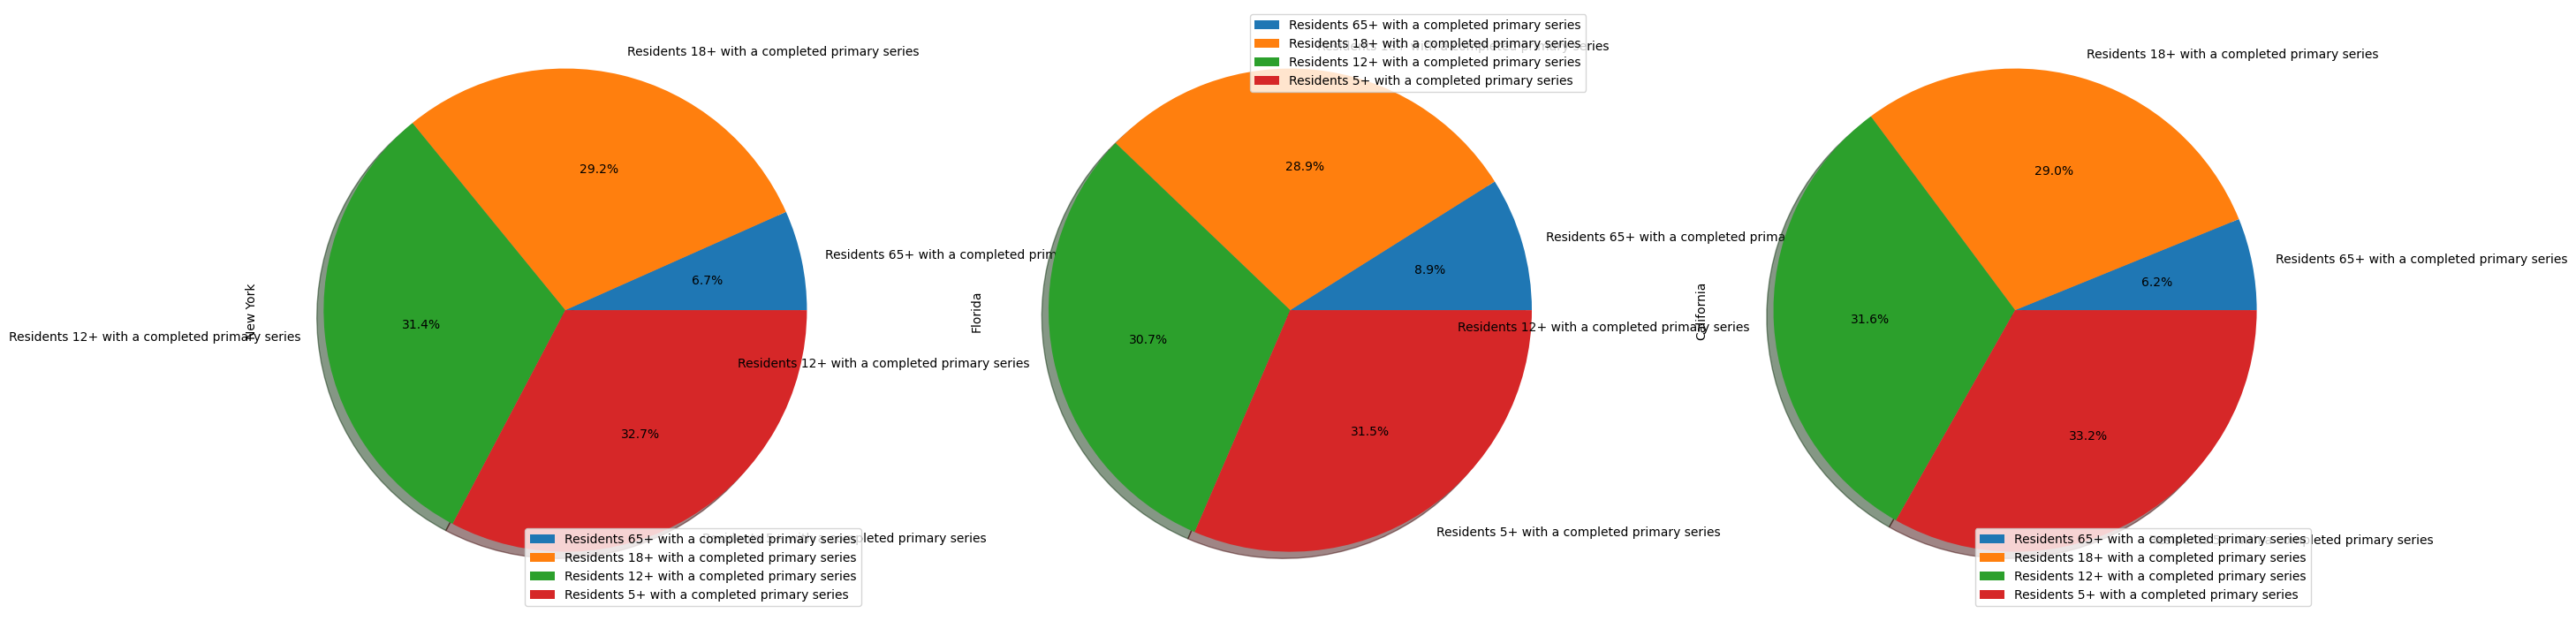

In [112]:
xl_one_series_pie= xl_one_series_index.T.plot.pie(subplots=True,autopct='%1.1f%%',figsize=(30,15),shadow=True,)

In [ ]:
lg_one_series_index= pd.DataFrame({'Residents 65+ with a completed primary series':[2445124,1865350,1615024],
                           'Residents 18+ with a completed primary series':[8447352,7874806,5615530],
                           'Residents 12+ with a completed primary series':[9003735,8534152,5984396],
                           'Residents 5+ with a completed primary series':[9373738,8988132,6221234]},
                           index=['Pennsylvania','Illinois','Michigan'])



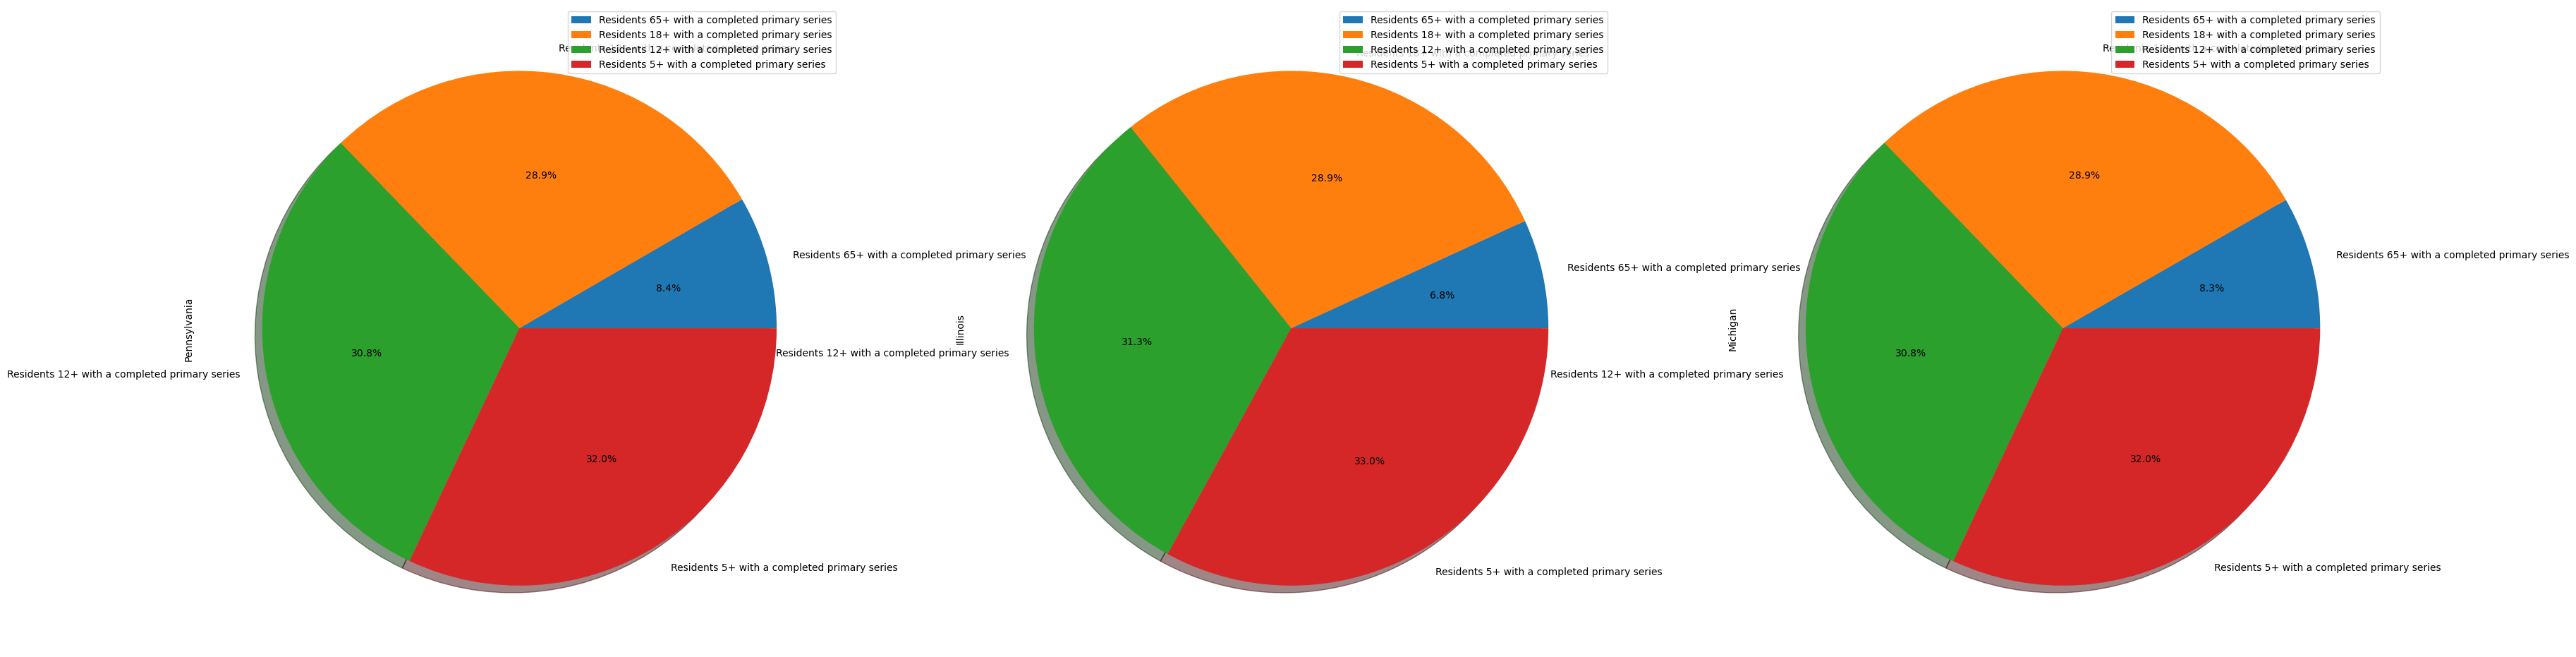

In [122]:
lg_one_series_pie= lg_one_series_index.T.plot.pie(subplots=True,autopct='%1.1f%%',figsize=(40,15),shadow=True,)